# Simulating the dynamics of a Cascade of mass/spring system with viscous friction

In [25]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib as mpl
mpl.use('Qt5Agg')

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.ion()

import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify

from scipy.integrate import solve_ivp

y (state) = [x1, x2, x1dot, x2dot]

dydt = [x1dot, x2dot, x1ddot, x2ddot]

m1*x1ddot = u1 - k1*x1 + k2*(x2 - x1) - mu1*m1*grav*x1dot


m2*x2ddot = u2 - k2*(x2 - x1) - mu2*m2*grav*x2dot

In [84]:
(t, 
 x1, 
 x2,
 m1,
 m2,
 mu1,
 mu2,
 g,
 k1,
 k2,
 u1,
 u2) = symbols("""t, 
                  x1(t), 
                  x2(t),
                  m1,
                  m2,
                  mu1,
                  mu2,
                  g,
                  k1,
                  k2,
                  u1,
                  u2""" , real = True)
x1 = Function('x1', real = True)(t)
x2 = Function('x2', real = True)(t)
u1 = Function('u1', real = True)(t)
u2 = Function('u2', real = True)(t)

In [94]:
x1dot = diff(x1, t)
x2dot = diff(x2, t)
u = Matrix([u1, u2])
x = Matrix([x1, x2, x1dot, x2dot])
x

Matrix([
[               x1(t)],
[               x2(t)],
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]])

In [82]:
test = Matrix([[1, 0, 0], [0, 1, 0]])
test

Matrix([
[1, 0, 0],
[0, 1, 0]])

In [99]:
A = Matrix([[0, 0, 1, 0], #x1
            [0, 0, 0, 1], #x2
            [(-k1-k2)/m1, k2/m1, -mu1*g, 0], #x1dot
            [k2/m2, -k2/m2, 0, -mu2*g]])#x2dot        #Holds dynamics
B = Matrix([[0, 0], [0, 0], [1/m1, 0], [0, 1/m2]])#Holds input dynamics

A

Matrix([
[            0,      0,      1,      0],
[            0,      0,      0,      1],
[(-k1 - k2)/m1,  k2/m1, -g*mu1,      0],
[        k2/m2, -k2/m2,      0, -g*mu2]])

In [101]:
# Write full dynamics
xdot = A@x + B @ u
xdot

Matrix([
[                                                      Derivative(x1(t), t)],
[                                                      Derivative(x2(t), t)],
[-g*mu1*Derivative(x1(t), t) + k2*x2(t)/m1 + (-k1 - k2)*x1(t)/m1 + u1(t)/m1],
[        -g*mu2*Derivative(x2(t), t) + k2*x1(t)/m2 - k2*x2(t)/m2 + u2(t)/m2]])

In [126]:
def springmass(t, state, u):
    # define parameters of system
    m1 = 1
    m2 = 2
    mu1 = 0.5
    mu2 = 0.7
    g = 9.8
    k1 = 5
    k2 = 6

    x1, x2, x1dot, x2dot = state
    u1, u2 = u
    dydt = [x1dot, #x1
            x2dot, #x2
            (-k1-k2)/m1*x1 + k2/m1*x2 + -mu1*g*x1dot, #x1dot
            k2/m2*x1 + -k2/m2*x2 + -mu2*g*x2dot]#x2dot]
    print(dydt)
    return dydt

In [127]:
dt = 0.001
time = np.linspace(0, 5, int(10/dt))
x1_0 = 1
x2_0 = 2
x1dot_0 = 0.5
x2dot_0 = 0.1

u = np.array([ 0.5, 5])

sol = solve_ivp(lambda t, y: springmass(t, y, u),
                [0, 10], [x1_0, x2_0, x1dot_0, x2dot_0],
                t_eval = time,
                rtol = 1e-8, atol = 1e-8)

[0.5, 0.1, -1.4500000000000002, -3.686]
[0.49625907936631836, 0.09049032175465481, -1.4443112206915392, -3.6176676729194024]
[0.4982381611182281, 0.09552128405640609, -1.4473207898384106, -3.6538179350696174]
[0.4973609040074901, 0.09332591716388589, -1.4460093714123858, -3.6380175399521955]
[0.4929780788470609, 0.08239168359482868, -1.4394757830435694, -3.55929804053395]
[0.4922004153354998, 0.08046703565686872, -1.4383226872638741, -3.5454314553084494]
[0.491230029871446, 0.07808014929681435, -1.43689835007797, -3.5282219322031056]
[0.49123087614841443, 0.07808873388775178, -1.4369091025226695, -3.528277248333798]
[0.4859302810911497, 0.06507331843082124, -1.4291408699108286, -3.4344193944827293]
[0.48331222170982113, 0.05895512057792981, -1.4254968321612753, -3.3900664558433893]
[0.4702420005646519, 0.028627986210763734, -1.407336240986354, -3.170075375484759]
[0.46792024861849774, 0.023287712824741638, -1.4040295347826302, -3.131334322014209]
[0.46504726468325663, 0.016929828227323

Text(0.5, 1.0, 'x1 displacement over time')

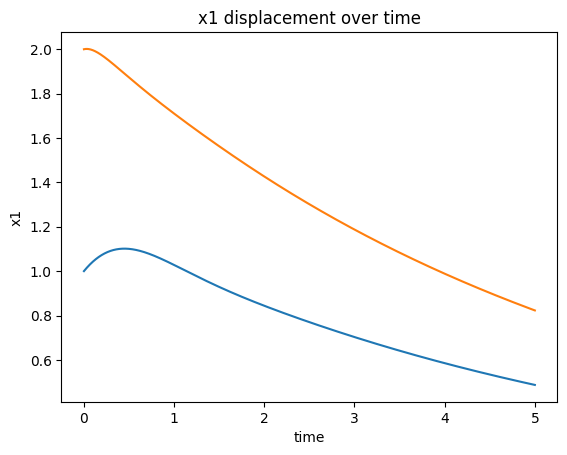

In [125]:
plt.figure(1)
plt.clf()
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.ylabel('x1')
plt.xlabel('time')
plt.title("x1 displacement over time")